In [67]:
# This is Eli's Python File
# Import statements
import numpy as np
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [11]:
# Read the affordability data
median_income_csv = Path("../Data/household_income_msa_2019.csv")
median_income_df = pd.read_csv(median_income_csv)
# Clean the affordability data
median_income_df = median_income_df.transpose() # Transpose the column/headers
new_header = median_income_df.iloc[0] #grab the first row for the header
median_income_df = median_income_df[1:] #take the data less the header row
median_income_df.columns = new_header #set the header row as the df header
median_income_df = median_income_df[['Median income (dollars)','Mean income (dollars)']] # Use only median and mean income data columns
median_income_df.reset_index(inplace=True)
median_income_df[['MSA','extra']] = median_income_df['index'].str.split(",", n = 1, expand=True) # Split MSA from text string
median_income_df[['State','extra2']] = median_income_df['extra'].str.split(n = 1, expand=True) # Split State from remaining text string
median_income_df[['Primary MSA','Secondary MSA']] = median_income_df['MSA'].str.split("-", n = 1, expand=True) # Split primary MSA from first text string
median_income_df[['Primary State','Secondary State']] = median_income_df['State'].str.split("-", n = 1, expand=True) # Split primary State from first text string
median_income_df.drop(columns=['index','extra','extra2','MSA','State'],inplace=True) # Drop unnecessary columns
median_income_df.drop_duplicates(subset=['Primary MSA','Primary State'], inplace=True) # Drop duplicates -- first instance is the median and mean income by MSA
median_income_df.head()

Label,Median income (dollars),Mean income (dollars),Primary MSA,Secondary MSA,Primary State,Secondary State
0,"61,026","77,948",Aberdeen,None,WA,None
8,"54,808","71,517",Abilene,None,TX,None
16,"53,865","69,443",Adrian,None,MI,None
24,"16,311","25,781",Aguadilla,Isabela,PR,None
32,"57,158","80,800",Akron,None,OH,None


In [88]:
# # Testing Monte Carlo Simulation
# # Read in test CSV
# test_csv = Path("../Data/sim_test_data.csv")
# test_df = pd.read_csv(test_csv)
# test_df.set_index('Date', inplace=True)
# test_df.columns = [test_df.columns,['Ticker'] * len(test_df.columns), ['close'] * len(test_df.columns)]
# test_df.head()

# MC_oneyear = MCSimulation(
#     portfolio_data = test_df['Test_MSA'],
#     weights = [1],
#     num_simulation = 10,
#     num_trading_days = 12*1
# )

# # Running a Monte Carlo simulation to forecast cumulative returns
# sim_df = MC_oneyear.calc_cumulative_return() - 1
# end_return = pd.DataFrame(index=['Average Cumulative Return'])
# end_return['Test_MSA'] = sim_df.iloc[-1,:].mean()


,Test_MSA,Test_MSA2
,Ticker,Ticker
,close,close
Date,,
12/31/2019,100,100
1/31/2020,105,104
2/29/2020,102,103
3/31/2020,106,101
4/30/2020,110,99


In [130]:
# Read in test CSV
file_name='house_prices_msa.csv'
csv_file=Path(f"../Data/{file_name}")

# Clean data
house_price_df= pd.read_csv(csv_file)
region_id_df=house_price_df#(set_index='RegionID')
region_id_df.set_index(region_id_df['RegionName'],inplace=True)
region_id_df=region_id_df.drop(columns=['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])
region_id_df=region_id_df.transpose()
region_id_df.columns.name = None
region_id_df.columns = [region_id_df.columns,['Ticker'] * len(region_id_df.columns), ['close'] * len(region_id_df.columns)]
region_id_df.head()

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,...,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker
,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
1/31/1996,107630.0,187842.0,183929.0,164647.0,114406.0,121233.0,110773.0,178034.0,109403.0,120291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60501.0,NaN,NaN,NaN
2/29/1996,107657.0,187403.0,184185.0,164345.0,114471.0,121078.0,110849.0,177811.0,109533.0,120519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60725.0,NaN,NaN,NaN
3/31/1996,107707.0,187125.0,184205.0,163946.0,114634.0,120937.0,110858.0,177681.0,109670.0,120740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60961.0,NaN,NaN,NaN
4/30/1996,107834.0,186592.0,184312.0,163493.0,114962.0,120693.0,111007.0,177407.0,109917.0,121229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61420.0,NaN,NaN,NaN
5/31/1996,107977.0,186274.0,184286.0,162886.0,115314.0,120527.0,111148.0,177288.0,110132.0,121711.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61747.0,NaN,NaN,NaN


In [131]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
end_return = pd.DataFrame(index=['Average Cumulative Return'])
for msa in region_id_df.columns.get_level_values(0):

    MC_oneyear = MCSimulation(
        portfolio_data = region_id_df[msa],
        weights = [1],
        num_simulation = 10,
        num_trading_days = 12*1
    )

    # Running a Monte Carlo simulation to forecast cumulative returns
    sim_df = MC_oneyear.calc_cumulative_return() - 1
    end_return[msa] = sim_df.iloc[-1,:].mean()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 0.
Running Monte Ca

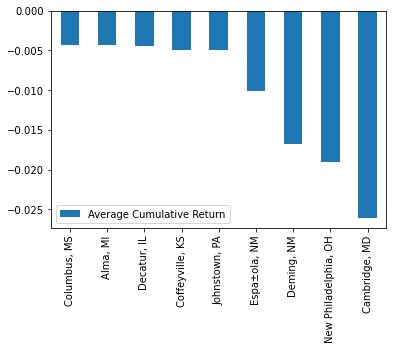

In [156]:
house_price_forecast = end_return.sort_values(by='Average Cumulative Return', axis=1,ascending=False)
house_price_forecast = house_price_forecast.transpose()

plot_data = house_price_forecast.iloc[-10:-1,:]
plot_data.plot(kind='bar')